<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final Project - Programming For Data Science<br>
  @ FIT-HCMUS, VNU-HCM 📌
</div>

## Import

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.linear_model import LinearRegression
import warnings

warnings.simplefilter('ignore')

## Read Data 

In [2]:
df = pd.read_csv('../Data/data.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


## Thông tin các cột

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

## Exploring Data

### Có bao nhiêu hàng và bao nhiêu cột?

In [4]:
df.shape

(114000, 20)

### Ý nghĩa của từng hàng là gì?
- Mỗi dòng thể hiện thông tin các thuộc tính của một bài hát trên spotify

### Có hàng trùng lặp không?

In [5]:
duplicates = df.duplicated().sum()

print("There are {} duplicate rows in the dataset".format(duplicates))

df = df.drop_duplicates()

df.shape

There are 450 duplicate rows in the dataset

(113550, 20)

### Ý nghĩa của từng cột là gì?

- 1. **track_id**: Định danh duy nhất của bài hát.
- 2. **track_name**: Tên của bài hát.
- 3. **artist**: Nghệ sĩ thực hiện hoặc sáng tạo bài hát.
- 4. **popularity**: Giá trị số (từ 0 đến 100) chỉ mức độ phổ biến của bài hát, số càng cao càng tốt.
- 5. **explicit**: Giá trị boolean cho biết bản nhạc có chứa nội dung phản cảm hay không.
- 6. **album_name**: Tên của album mà bài hát thuộc về.
- 7. **time_signature**: Số nhịp trong mỗi ô nhịp của bản nhạc.
- 8. **track_genre**: Thể loại của danh sách phát.
- 9. **danceability**: Đo lường (từ 0.0 đến 1.0) mức độ phù hợp của bài hát cho việc nhảy múa.
- 10. **energy**: Đo lường (từ 0.0 đến 1.0) chỉ mức độ năng lượng và hoạt động của bài hát.
- 11. **key**: Tông chính của bài hát, sử dụng ký hiệu Pitch Class chuẩn (ví dụ, 0 = C).
- 12. **loudness**: Độ lớn tổng thể của bài hát tính bằng decibels (dB).
- 13. **mode**: Chỉ thể loại (trưởng hoặc thứ) của bài hát, với trưởng được biểu thị bởi 1 và thứ bởi 0.
- 14. **speechiness**: Đo lường xác định sự hiện diện của lời nói trong bài hát.
- 15. **acousticness**: Đo lường (từ 0.0 đến 1.0) chỉ mức độ bài hát có thể là acoustic.
- 16. **instrumentalness**: Dự đoán liệu bài hát có chứa lời ca hay không.
- 17. **liveness**: Phát hiện sự hiện diện của khán giả trong bản ghi.
- 18. **valence**: Đo lường (từ 0.0 đến 1.0) mô tả tính chất âm nhạc tích cực được truyền đạt bởi bài hát.
- 19. **tempo**: Tốc độ tổng thể ước lượng của bài hát tính bằng nhịp độ mỗi phút (BPM).
- 20. **duration_ms**: Thời lượng của bài hát tính bằng mili giây.

### Loại dữ liệu hiện tại của mỗi cột là gì?

In [6]:
data_types = df.dtypes
data_types

track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

### Có cột nào có kiểu dữ liệu không phù hợp không?

In [7]:
inappropriate_data_types = {}
for column, dtype in data_types.items():
    if "id" in column and dtype != 'object':
        inappropriate_data_types[column] = dtype
    elif "date" in column and dtype != 'datetime64[ns]':
        inappropriate_data_types[column] = dtype
    elif "popularity" in column and dtype != 'float' and dtype != 'int64':
        inappropriate_data_types[column] = dtype
    elif "explicit" in column and dtype != 'bool':
        inappropriate_data_types[column] = dtype

# nếu có dữ liệu sai thì in ra thông báo
if len(inappropriate_data_types) == 0:
    print("Tất cả dữ liệu đều hợp lệ")
else:
    print("Có dữ liệu không hợp lệ")
    print(inappropriate_data_types)

Tất cả dữ liệu đều hợp lệ


### Với mỗi cột số, các giá trị được phân bổ như thế nào?

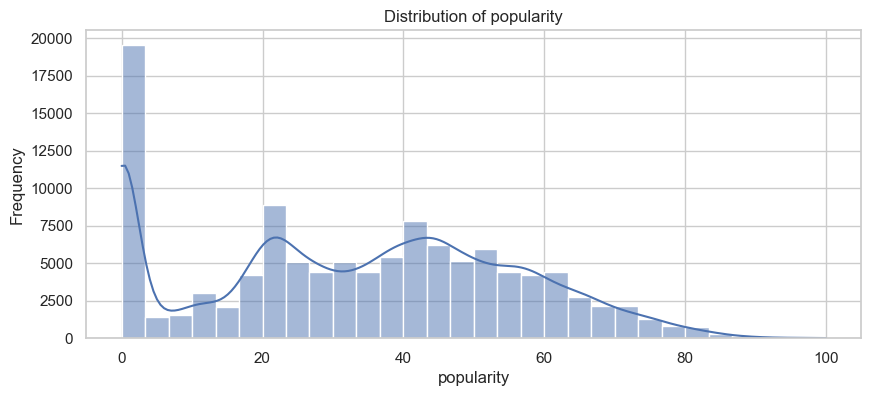

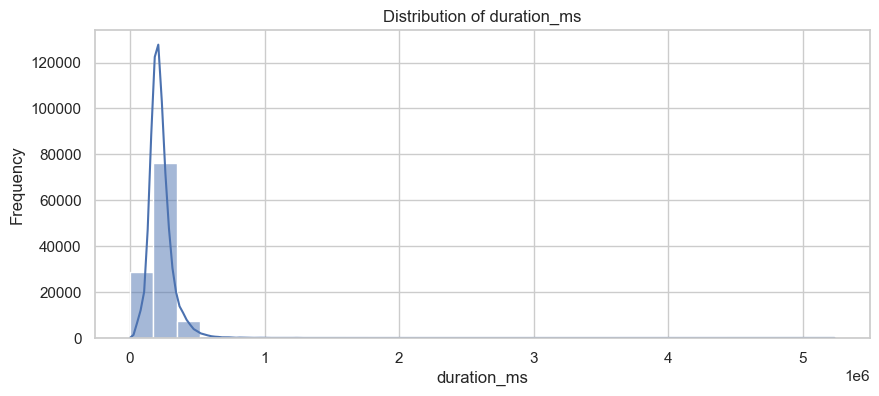

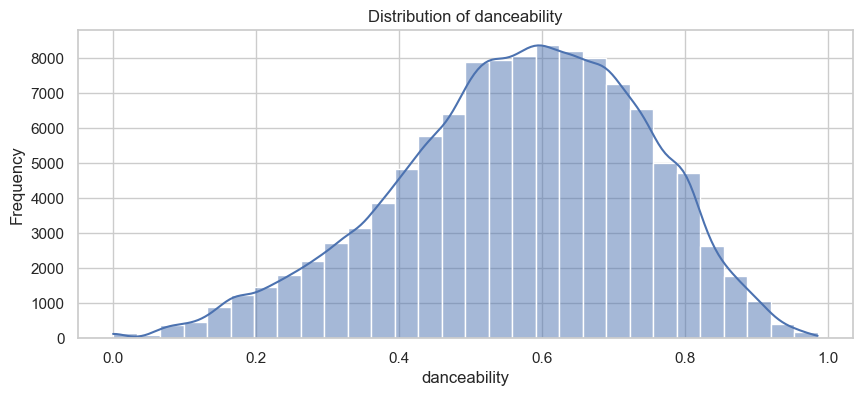

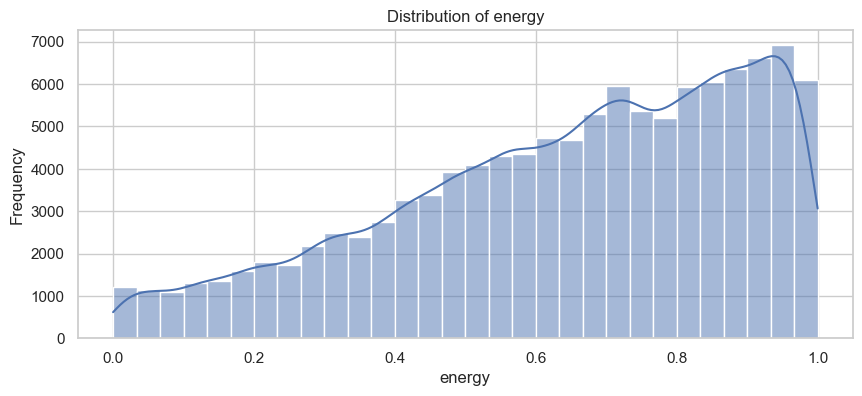

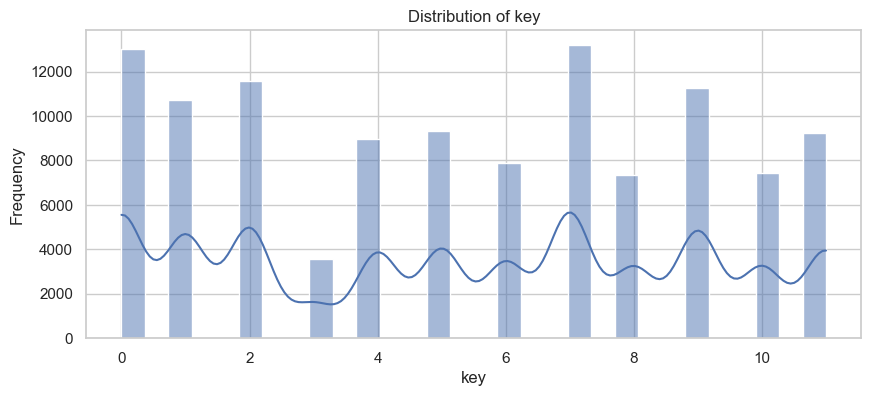

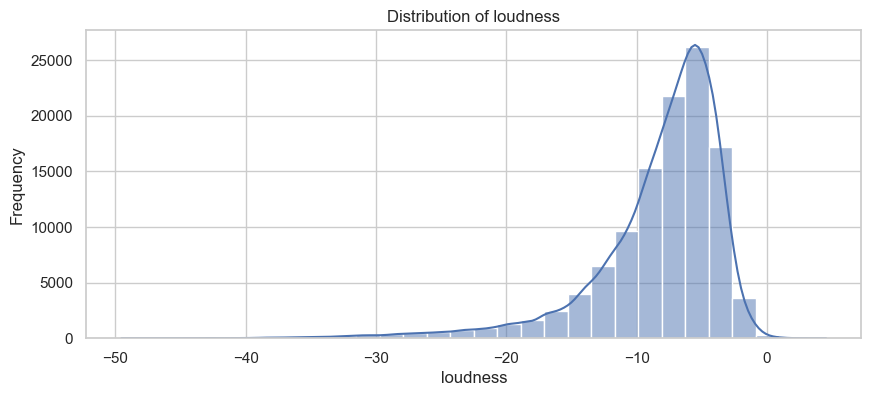

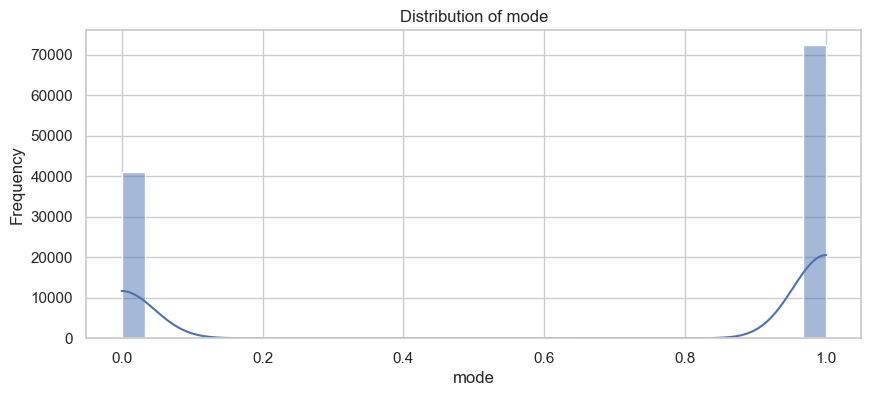

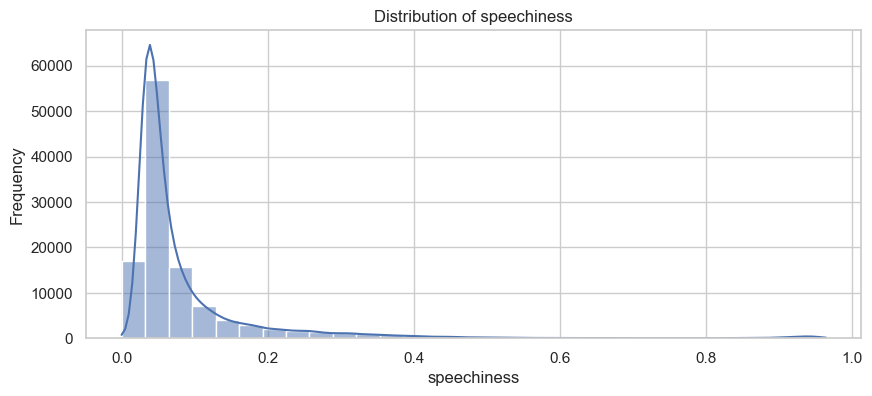

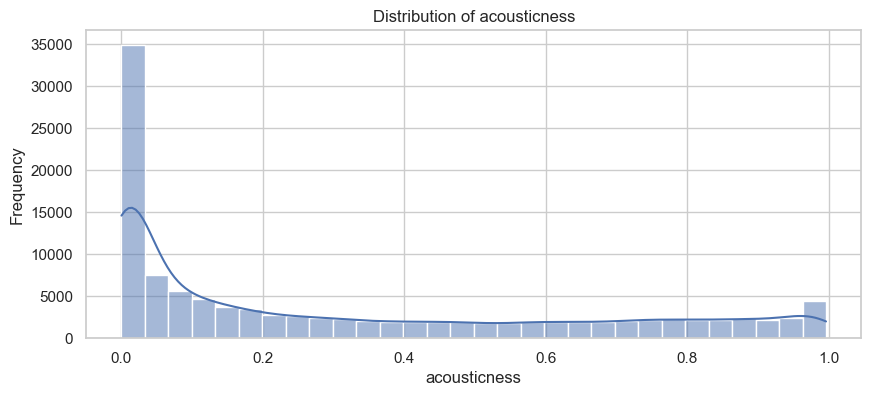

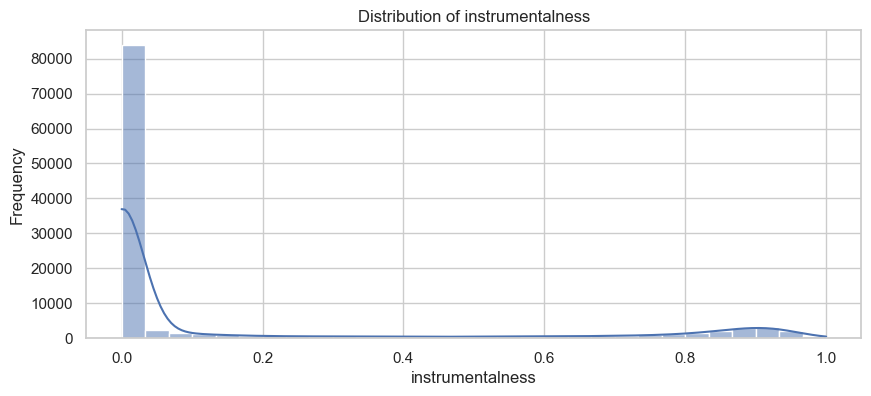

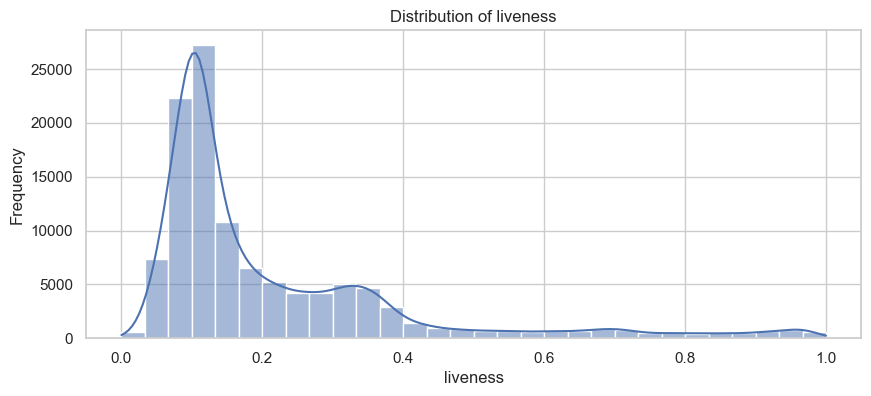

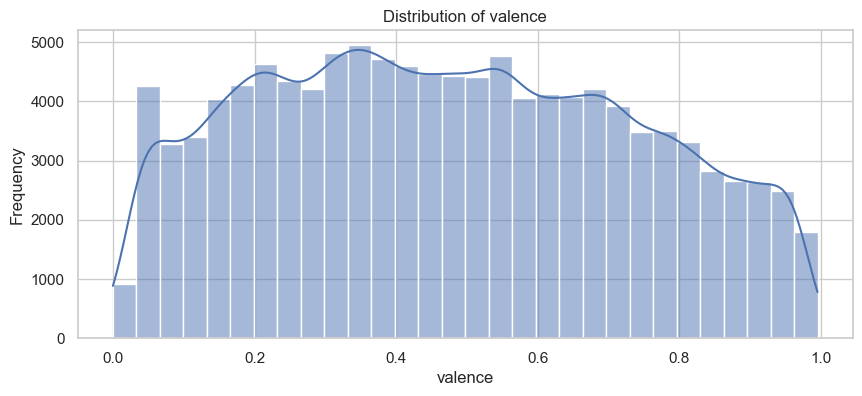

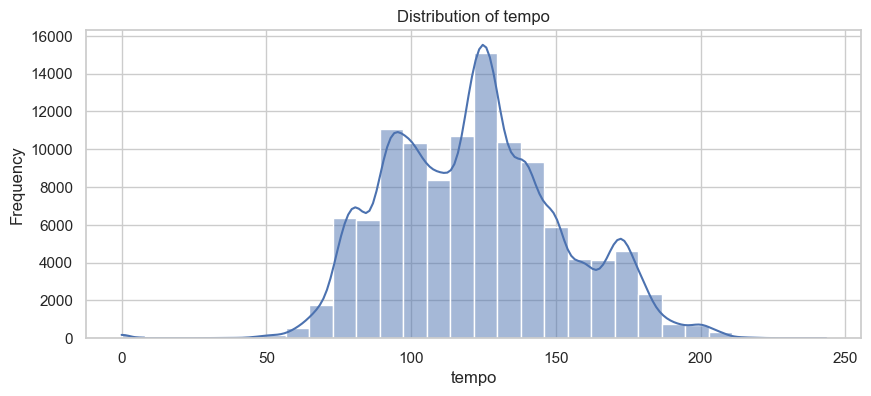

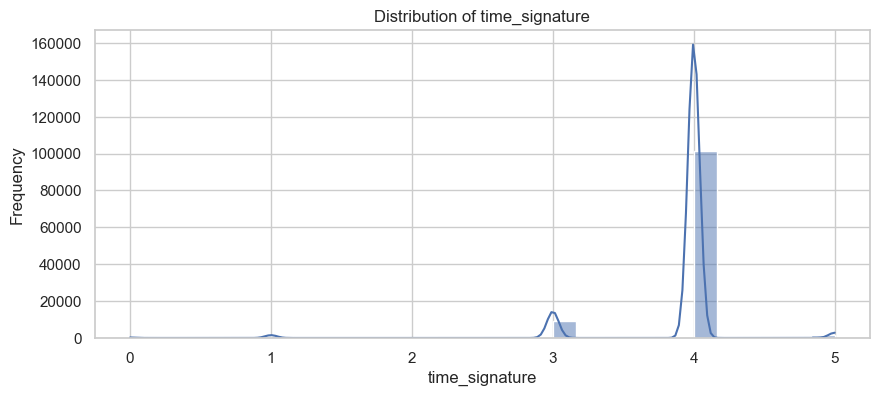

In [8]:
# Setting the plot style
sns.set(style="whitegrid")
# lọc ra các cột numerical
numerical_columns = df.select_dtypes(include=['float64', 'int64'])
# Plotting distributions
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], bins=30, kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

### Đối với các cột có kiểu dữ liệu số sẽ tính:
- The min
- The lower quartile (phân vị 25)
- The median (phân vị 50)
- The upper quartile (phân vị 75)
- The max

In [9]:
# Hàm tính missing_ratio (tỷ lệ thiếu)
def missing_ratio(x):
    return (x.isnull().mean() * 100)

# Hàm tính lower quartile (phân vị 25)
def lower_quartile(x):
    return x.quantile(0.25)

# Hàm tính median (phân vị 50)
def median(x):
    return x.quantile(0.5)

# Hàm tính upper quartile (phân vị 75)
def upper_quartile(x):
    return x.quantile(0.75)

num_col_info_df = numerical_columns.agg(["min", lower_quartile, median, upper_quartile, "max"])
num_col_info_df = num_col_info_df.round(1)
num_col_info_df

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
min,0.0,0.0,0.0,0.0,0.0,-49.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
lower_quartile,17.0,174180.2,0.5,0.5,2.0,-10.0,0.0,0.0,0.0,0.0,0.1,0.3,99.3,4.0
median,35.0,213000.0,0.6,0.7,5.0,-7.0,1.0,0.0,0.2,0.0,0.1,0.5,122.0,4.0
upper_quartile,50.0,261587.8,0.7,0.9,8.0,-5.0,1.0,0.1,0.6,0.0,0.3,0.7,140.1,4.0
max,100.0,5237295.0,1.0,1.0,11.0,4.5,1.0,1.0,1.0,1.0,1.0,1.0,243.4,5.0


### Tỷ lệ phần trăm của các giá trị bị thiếu là bao nhiêu?

In [10]:
# tính phần trăm dữ liệu thiếu
missing_values_percentage_df = numerical_columns.agg([missing_ratio])
missing_values_percentage_df

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
missing_ratio,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df.shape

(113550, 20)

### Với mỗi cột phân loại, các giá trị được phân bổ như thế nào?

In [12]:
# lọc ra các cột categorical
categorical_columns = df.select_dtypes(exclude=['number'])

In [13]:
pd.set_option('display.max_colwidth', 100) # For clearly
pd.set_option('display.max_columns', None) # For clearly

In [14]:
# Hàm để tính tỷ lệ còn thiếu
def missing_ratio(x):
    return (x.isnull().mean() * 100)

# Hàm để tính số lượng giá trị duy nhất (đếm các giá trị không thiếu)
def num_values(x):
    return len(x.dropna().unique())

# Hàm để tính các tỷ lệ giá trị
def value_ratios(x):
    # Tạo một Series với tỷ lệ xuất hiện của từng giá trị
    value_counts = x.value_counts(normalize=True)

    # Sắp xếp theo tỷ lệ giảm dần
    sorted_value_counts = value_counts.sort_values(ascending=False)
    
    # Lưu vào từ điển
    value_ratios = {value: round(percentage * 100,1) for value, percentage in sorted_value_counts.items()}
    
    return value_ratios

# Gán DataFrame mới để lưu kết quả
cat_col_info_df = categorical_columns.agg([num_values, value_ratios])
cat_col_info_df

,track_id,artists,album_name,track_name,explicit,track_genre
num_values,89741,31437,46589,73608,2,114
value_ratios,"{'6S3JlDAGk3uu3NtZbPnuhS': 0.0, '2Ey6v4Sekh3Z0RUSISRosD': 0.0, '2kkvB3RNRzwjFdGhaUA0tz': 0.0, '4...","{'The Beatles': 0.2, 'George Jones': 0.2, 'Stevie Wonder': 0.2, 'Linkin Park': 0.2, 'Ella Fitzge...","{'Alternative Christmas 2022': 0.2, 'Feliz Cumpleaños con Perreo': 0.2, 'Metal': 0.1, 'Halloween...","{'Run Rudolph Run': 0.1, 'Halloween': 0.1, 'Frosty The Snowman': 0.1, 'Little Saint Nick - 1991 ...","{False: 91.4, True: 8.6}","{'acoustic': 0.9, 'singer-songwriter': 0.9, 'reggae': 0.9, 'techno': 0.9, 'songwriter': 0.9, 'sa..."


In [15]:
# tính phần trăm dữ liệu thiếu
missing_values_categorical_df = categorical_columns.agg([missing_ratio])
missing_values_categorical_df

df = df.dropna()
df.shape

(113549, 20)

### Có bao nhiêu giá trị khác nhau? Hiển thị một số

In [16]:
# Đếm số lượng giá trị duy nhất trong mỗi cột
unique_values_count = {}
examples_of_values = {}
for column in categorical_columns:
    unique_values = categorical_columns[column].nunique()
    unique_values_count[column] = unique_values
    examples_of_values[column] = categorical_columns[column].unique()

pd.DataFrame.from_dict(unique_values_count, orient='index', columns=['Unique Values Count'])

,Unique Values Count
track_id,89741
artists,31437
album_name,46589
track_name,73608
explicit,2
track_genre,114


In [17]:
# in ra các giá trị duy nhất trong mỗi cột tượng trưng cho cột đó
unique_values_examples = {column: df[column].unique()[:5] for column in categorical_columns}
unique_values_examples

{'track_id': array(['5SuOikwiRyPMVoIQDJUgSV', '4qPNDBW1i3p13qLCt0Ki3A',
        '1iJBSr7s7jYXzM8EGcbK5b', '6lfxq3CG4xtTiEg7opyCyx',
        '5vjLSffimiIP26QG5WcN2K'], dtype=object),
 'artists': array(['Gen Hoshino', 'Ben Woodward', 'Ingrid Michaelson;ZAYN',
        'Kina Grannis', 'Chord Overstreet'], dtype=object),
 'album_name': array(['Comedy', 'Ghost (Acoustic)', 'To Begin Again',
        'Crazy Rich Asians (Original Motion Picture Soundtrack)',
        'Hold On'], dtype=object),
 'track_name': array(['Comedy', 'Ghost - Acoustic', 'To Begin Again',
        "Can't Help Falling In Love", 'Hold On'], dtype=object),
 'explicit': array([False,  True]),
 'track_genre': array(['acoustic', 'afrobeat', 'alt-rock', 'alternative', 'ambient'],
       dtype=object)}

In [18]:
print(f"- Tổng các cột (các loại dữ liệu có thể khai thác): {df.shape[1]}")
df.dtypes

- Tổng các cột (các loại dữ liệu có thể khai thác): 20


track_id             object
artists              object
album_name           object
track_name           object
popularity            int64
duration_ms           int64
explicit               bool
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
time_signature        int64
track_genre          object
dtype: object

In [19]:
df.shape

(113549, 20)

## Questions

### Câu hỏi 1: So sánh độ nổi tiếng giữa những nghệ sĩ có những bài hát tiêu cực và nghệ sĩ có những bài hát tích cực?

**Mục đích:** 
* **Khả năng tạo ấn tượng:** Nghệ sĩ có những bài hát tích cực thường có khả năng tạo ấn tượng tích cực với người nghe, mang đến cảm xúc lạc quan và niềm vui. Ngược lại, những nghệ sĩ với những bài hát tiêu cực có thể tạo ra sự chấn động, nhưng có thể thu hút người nghe quan tâm đến các chủ đề nổi bật và tranh cãi.

* **Ảnh hưởng xã hội:** Những nghệ sĩ sáng tác những bài hát tích cực thường có thể gặt hái được sự ủng hộ lớn từ cộng đồng, vì thông điệp tích cực của họ có thể lan tỏa tới người nghe và xã hội. Ngược lại, những nghệ sĩ với những bài hát tiêu cực có thể phải đối mặt với sự phê phán và tranh cãi từ một số người nghe.

* **Thị trường âm nhạc:** Thị trường âm nhạc có thể ưa chuộng các bài hát tích cực hoặc tiêu cực tùy thuộc vào xu hướng và sở thích của thời đại. Có thể có những thời kỳ nơi mà người nghe đặc biệt quan tâm đến một loại thông điệp âm nhạc hơn là loại khác.

**Ý nghĩa:**
* Phản ánh sự ảnh hưởng của âm nhạc đối với khán giả và cộng đồng. 

**Các bước thực hiện:**

**Bước 1: Những bài có nhiều artist trở lên sẽ được tách ra và trải dài trong dataframe**

In [20]:
# Những bài có nhiều artist trở lên sẽ được tách ra và trải dài trong dataframe
df_copy=df
df_long = df_copy.assign(artists=df_copy['artists'].str.split(';')).explode('artists')
#Lấy ra những cột cần thiết để trả lời câu hỏi
question_col=['artists','popularity','valence']
df_question=df_long[question_col]
#Lọc ra những giá trị popularity và valence = 0
def is_positive(n): 
    return n  == 0 
df_question=df_question[is_positive(df_question['popularity'])==False]
df_question=df_question[is_positive(df_question['valence'])==False]
df_question

,artists,popularity,valence
0,Gen Hoshino,73,0.7150
1,Ben Woodward,55,0.2670
2,Ingrid Michaelson,57,0.1200
2,ZAYN,57,0.1200
3,Kina Grannis,71,0.1430
...,...,...,...
113995,Rainy Lullaby,21,0.0339
113996,Rainy Lullaby,22,0.0350
113997,Cesária Evora,22,0.7430
113998,Michael W. Smith,41,0.4130


**Bước 2: đếm số lượng bài hát của nghệ sĩ lưu lại thành cột weight**

In [21]:
# đếm số lượng bài hát của nghệ sĩ lưu lại thành cột weight
count_per_artist = df_question['artists'].value_counts()
df_question['weight'] = df_question['artists'].map(count_per_artist)
df_question1=df_question
df_question1

,artists,popularity,valence,weight
0,Gen Hoshino,73,0.7150,10
1,Ben Woodward,55,0.2670,13
2,Ingrid Michaelson,57,0.1200,12
2,ZAYN,57,0.1200,12
3,Kina Grannis,71,0.1430,22
...,...,...,...,...
113995,Rainy Lullaby,21,0.0339,4
113996,Rainy Lullaby,22,0.0350,4
113997,Cesária Evora,22,0.7430,16
113998,Michael W. Smith,41,0.4130,31


**Bước 3:**
* Lọc ra những nghệ sĩ có hơn 100 bài hát
* Tính toán dựa trên valence và popularity
* Tính toán theo nghệ sĩ 
* Lưu trung bình độ nổi tiếng của nghệ sĩ vào dataframe

In [22]:
#Lọc ra những nghệ sĩ có hơn 100 bài hát
df_filtered = df_question1[df_question1['weight'] > 100]
# Tính toán dựa trên valence và popularity
Avg_popularity_filtered = (df_filtered['popularity'] * df_filtered['weight']).sum() / df_filtered['weight'].sum()
Avg_valence_filtered = (df_filtered['valence'] * df_filtered['weight']).sum() / df_filtered['weight'].sum()

# Tính toán theo nghệ sĩ 
Avg_artist_popularity = df_filtered.groupby('artists').apply(lambda x: (x['popularity']*x['weight']).sum() / x['weight'].sum())
Avg_artist_valence = df_filtered.groupby('artists').apply(lambda x: (x['valence']*x['weight']).sum() / x['weight'].sum())

In [23]:
# Lưu trung bình độ nổi tiếng của nghệ sĩ vào dataframe
Avg_artist_popularity.sort_values(ascending=False)
to_df2=pd.DataFrame({'artist':Avg_artist_popularity.index,'popularity':Avg_artist_popularity.values})
to_df2

,artist,popularity
0,A.R. Rahman,61.386792
1,Alan Menken,28.540541
2,Alan Walker,62.559322
3,Almafuerte,27.252427
4,Alphaxone,8.833333
...,...,...
61,Vybz Kartel,23.757962
62,Wolfgang Amadeus Mozart,10.880137
63,XXXTENTACION,63.870370
64,Yuvan Shankar Raja,52.557940


**Bước 4:**
* Sort những aritist có giá trị lớn nhất và bé nhất lấy 10 nghệ sĩ của mỗi giá trị lớn nhất và bé nhất
* Lưu lại thành từng dataframe
* Merge dataframe giữa trung bình valence và popularity tạo thành dataframe mới

In [24]:
#Sort những aritist có giá trị lớn nhất và bé nhất lấy 10 nghệ sĩ của mỗi giá trị lớn nhất và bé nhất
Avg_low_valence=Avg_artist_valence.sort_values(ascending=True)
Avg_high_valence=Avg_artist_valence.sort_values(ascending=False)
to_df=Avg_low_valence.head(10)
to_df1=Avg_high_valence.head(10)
#Lưu lại thành từng dataframe
df_low_valence=pd.DataFrame({'artist':to_df.index,'valence':to_df.values})
df_high_valence=pd.DataFrame({'artist':to_df1.index,'valence':to_df1.values})

In [25]:
# merge dataframe giữa trung bình valence và popularity tạo thành dataframe mới
merge_df=pd.merge(df_low_valence,to_df2,on='artist',how='inner')
merge_df1=pd.merge(df_high_valence,to_df2,on='artist',how='inner')
merge_df

,artist,valence,popularity
0,Alphaxone,0.052681,8.833333
1,Hans Zimmer,0.066657,34.447368
2,Germaine Franco,0.178908,24.150943
3,Hillsong Worship,0.180941,44.502994
4,Bethel Music,0.206141,51.792308
5,Boris Brejcha,0.249429,46.866667
6,Alan Menken,0.255306,28.540541
7,Martin Garrix,0.258472,57.603175
8,ILLENIUM,0.284604,50.265060
9,Chris Tomlin,0.298229,44.042735


**Bước 5:** Visualize kết quả

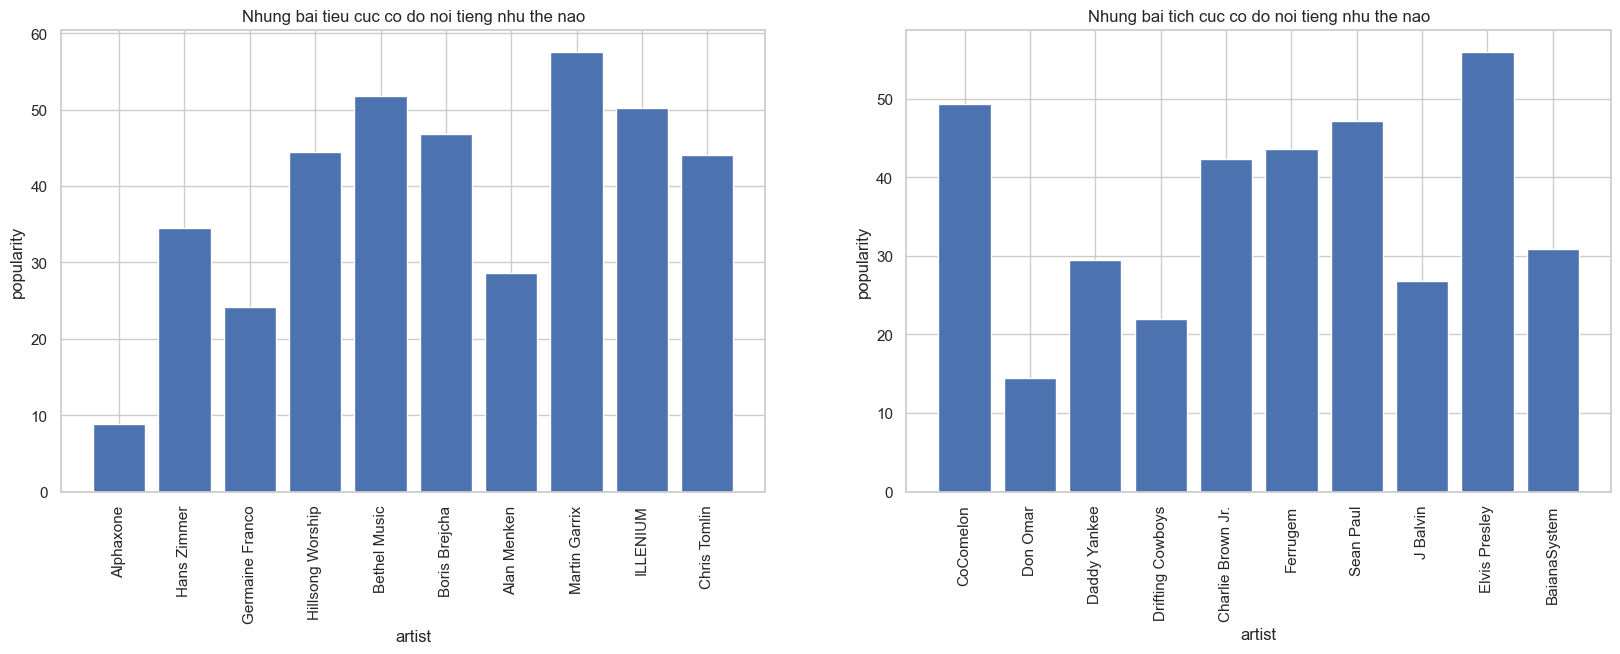

In [26]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Biểu đồ 1
ax1.bar(merge_df['artist'], merge_df['popularity'])
ax1.set_title('Nhung bai tieu cuc co do noi tieng nhu the nao')
ax1.set_xlabel('artist')
ax1.set_ylabel('popularity')
ax1.tick_params(axis='x', rotation=90)

# Biểu đồ 2
ax2.bar(merge_df1['artist'], merge_df1['popularity'])
ax2.set_title('Nhung bai tich cuc co do noi tieng nhu the nao')
ax2.set_xlabel('artist')
ax2.set_ylabel('popularity')
ax2.tick_params(axis='x', rotation=90)

# Hiển thị figure
plt.show()

* Qua biểu đồ ta thấy được độ phổ biến của những bài hát tiêu cực có độ nổi tiếng cao hơn so những bài hát tích cực  
* Trong biểu đồ tiêu cực ta thấy được nghệ sĩ có độ nổi tiếng nhiều nhất là Martin Garrix ta cũng có thể hiểu được vì Martin Garrix là DJ nhạc sĩ nổi tiếng xuất hiện trên nhiều nền tảng như youtube, spotify, apple music và có nhiều bài tiêu cực trở thành viral 
* Tronng biểu đồ tích cực ta thấy được nghệ sĩ có đội nổi tiếng nhiều nhất là Elvis Presley ta cũng có thể hiểu vì ông được coi là một trong những biểu tượng đại chúng quan trọng nhất của thế kỷ 20 và được mệnh danh là "Ông hoàng nhạc Rock and Roll".
* Lý do những bài hát tiêu cực thường có độ nổi tiếng hơn do giới trẻ hiện nay có xu hướng nghe nhạc tiêu cực vì
có thể xu hướng âm nhạc trong một khu vực hoặc quốc gia cụ thể làm cho bài hát tiêu cực phù hợp với sở thích và xu hướng hiện tại hơn so với bài hát tích cực.


### Câu hỏi 2: Thể loại nhạc nào có 'popularity' cao nhất?

- Lợi ích: Giúp ta biết được thể loại nhạc nào đang được ưu thích hay các thể loại nào đang bị kén người nghe.

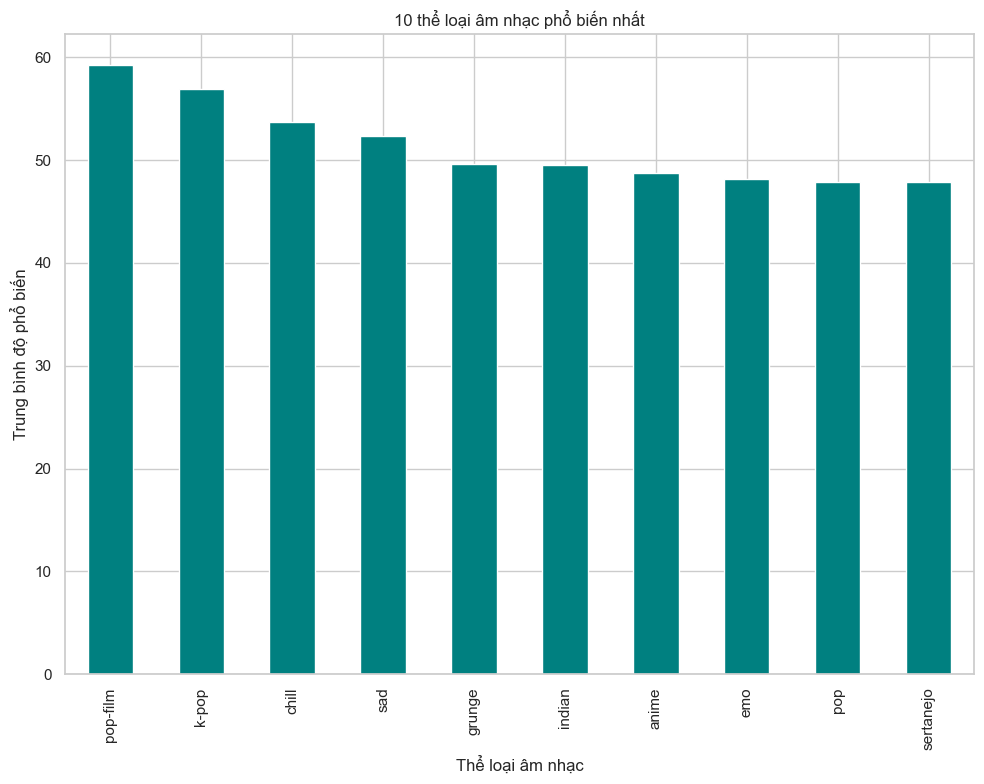

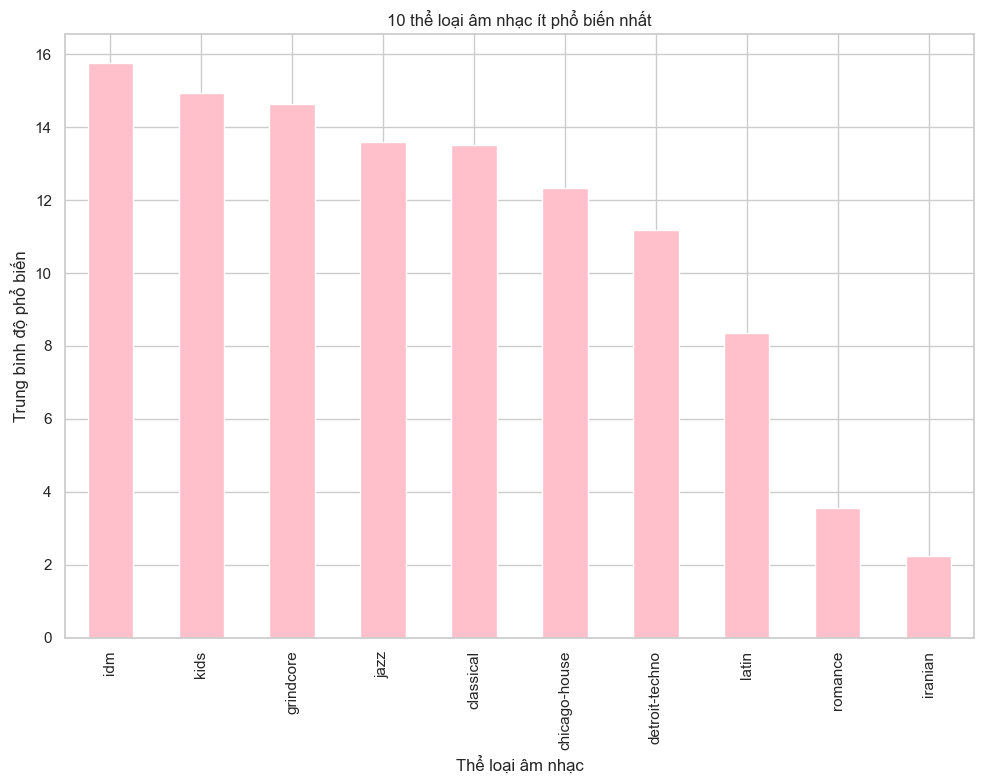

In [27]:
# Nhóm dữ liệu theo 'track_genre' và tính giá trị trung bình của 'popularity' cho mỗi thể loại
genre_popularity = df.groupby('track_genre')['popularity'].mean().sort_values(ascending=False)

# Vẽ 10 thể loại âm nhạc phổ biến nhất
plt.figure(figsize=(10,8))
genre_popularity[:10].plot(kind='bar', color='teal')
plt.title('10 thể loại âm nhạc phổ biến nhất')
plt.xlabel('Thể loại âm nhạc')
plt.ylabel('Trung bình độ phổ biến')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# Vẽ 10 thể loại âm nhạc ít phổ biến nhất
plt.figure(figsize=(10,8))
genre_popularity[-10:].plot(kind='bar', color='pink')
plt.title('10 thể loại âm nhạc ít phổ biến nhất')
plt.xlabel('Thể loại âm nhạc')
plt.ylabel('Trung bình độ phổ biến')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### Câu hỏi 3: Những bài nhạc chứa nội dung phản cảm có phổ biến và được mọi người nghe không? 

**Mục đích:**
* Xem độ phổ biến của các bài nhạc mang tính chất phản cảm có được nhiều người quan tâm và ủng hộ hay không.
* Xu hướng nghe nhạc của mọi người có phải là những bài nhạc phản cảm hay không.
* Ảnh hưởng của nhạc phản cảm đối với âm nhạc và người nghe như thế nào.


**Ý nghĩa:**
* Việc phổ biến của nhạc phản cảm có thể gây ảnh hưởng xấu về mặt tư tưởng và tinh thần của mọi người. Nếu các bài nhạc phản cảm quá phổ biến nó sẽ gây ra các tư tưởng lệch lạc và gây hại rất nhiều nhất là đối với giới trẻ. Vì thế thông qua câu hỏi này chúng ta có thể biết được mức độ phổ biến của nhạc phản cảm và cần có những giải pháp hợp lí cho vấn đề đó.

**Bước 1**: Kiểm tra dữ liệu nhạc phản cảm và không phản cảm chiếm bao nhiêu % 

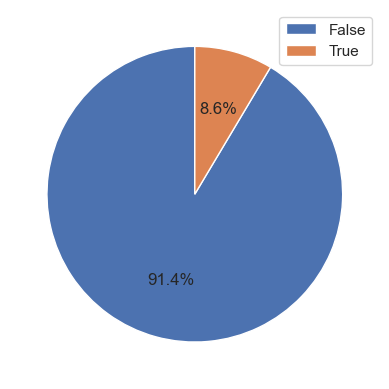

In [28]:
# Dem so luong cac bai hat chua noi dung phan cam va khong chua noi dung phan cam
df_explicit = df['explicit'].value_counts()

labels = df_explicit.keys()
sizes = (df_explicit.values / len(df['explicit'])) * 100

patches = plt.pie(sizes, autopct='%1.1f%%', startangle = 90) 
plt.legend(patches, labels = labels, loc = 'best')   

plt.show()

- Từ biểu đồ ta có thể thấy được là đa số các bài nhạc đều là nhạc không phản cảm và chiếm tới 91,4%.
- Trong khi đó những bài nhạc chứa từ ngữ phản cảm chỉ chiếm 8,6% rất ít so với những bài hát không phản cảm.

**Bước 2**: Kiểm tra sự ảnh hưởng của nhạc chứa nội dung phản cảm đối với các thuộc tính khác của bài nhạc.

In [29]:
# Kiem tra su anh huong cua nhac chua noi dung phan cam voi cac thuoc tinh khac cua bai nhac
df_explicit_comparison = df.groupby('explicit').mean(numeric_only = True)

df_explicit_comparison.reset_index(inplace = True)

print(df_explicit_comparison)

   explicit  popularity    duration_ms  danceability    energy       key  \
0     False   33.024896  230230.153567      0.560550  0.634698  5.304177   
1      True   36.524799  205122.916547      0.636285  0.721080  5.365816   

   loudness      mode  speechiness  acousticness  instrumentalness  liveness  \
0 -8.408969  0.643363     0.074726      0.323583          0.165463  0.211727   
1 -6.474483  0.579132     0.190962      0.212357          0.051427  0.233763   

    valence       tempo  time_signature  
0  0.474505  122.204140        3.899163  
1  0.471003  121.872358        3.958222  


- Vẽ biểu đồ trực quan kết quả trên một số thuộc tính.

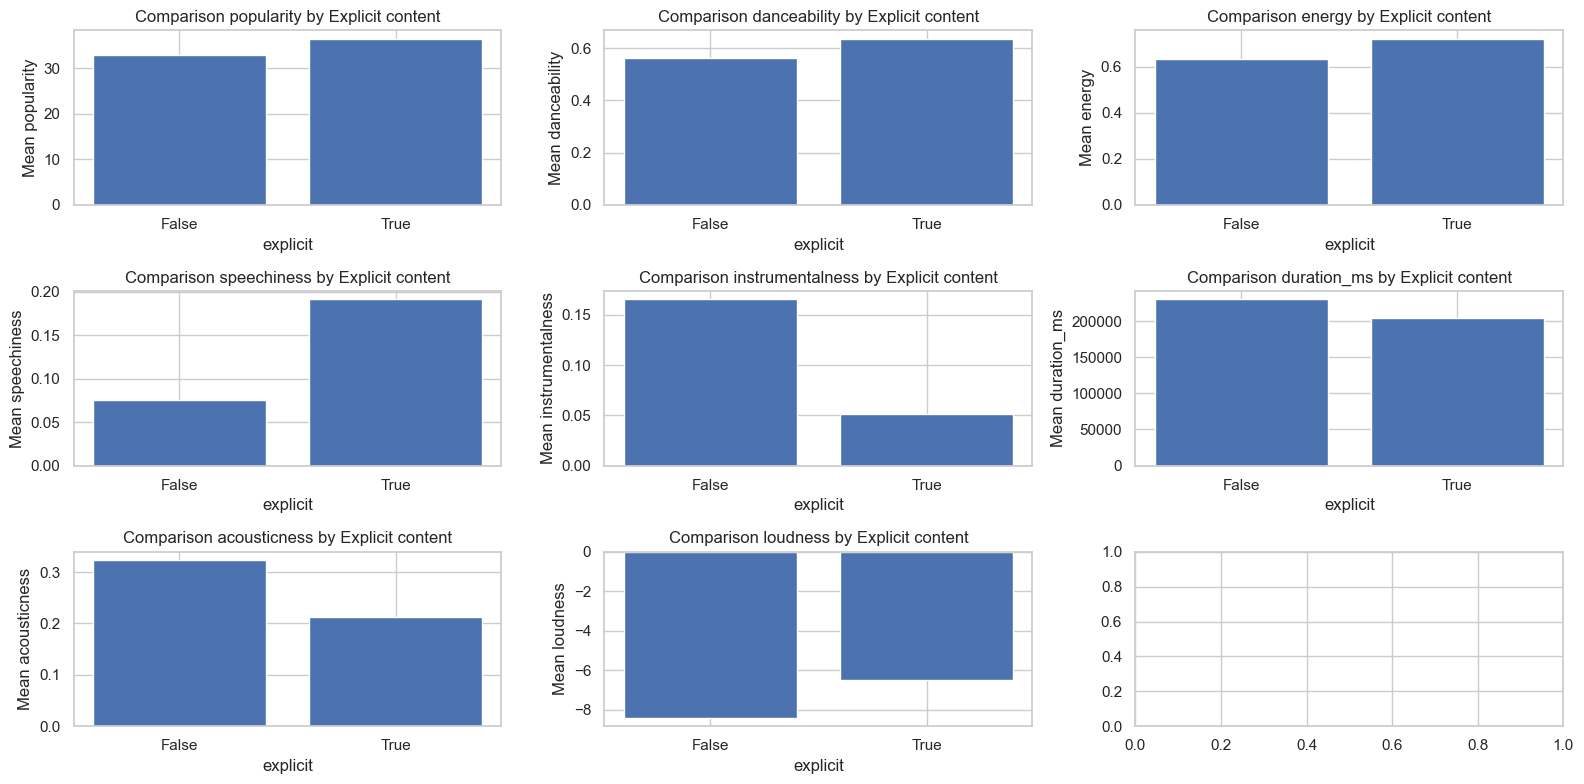

In [30]:
# Visualize coi cac thuoc tinh dac trung
attribute_comparison = ['popularity', 'danceability', 'energy', 'speechiness', 'instrumentalness', 'duration_ms', 'acousticness', 'loudness']

fig, axes = plt.subplots(3, 3, figsize = (16, 8))

for i, ax in enumerate(axes.flatten()):
    if i == 8:
        break
    ax.set_axisbelow(True)
    ax.bar(['False', 'True'], df_explicit_comparison[attribute_comparison[i]])
    ax.set_title(f'Comparison {attribute_comparison[i]} by Explicit content')
    ax.set_xlabel(f'explicit')
    ax.set_ylabel(f'Mean {attribute_comparison[i]}')

plt.tight_layout()
plt.show()

**Explicit và Popularity**:
- Trung bình các bản nhạc có nội dung phản cảm ít phổ biến hơn những bản nhạc không có nội dung phản cảm (32,94 < 36,45).
- Điều này cho thấy các bài nhạc không có nội dung phản cảm thường phổ biến hơn những bài nhạc có nội dung phản cảm.

**Explicit và các thuộc tính khác**:
- **Duration**: Các bản nhạc không có nội dung phản cảm có xu hướng ngắn hơn trung bình (205.128 mili giây so với 230.170 mili giây).
- **Danceability**: Các bản nhạc không có nội dung phản cảm có xu hướng dễ nhảy hơn (0,636 so với 0,560).
- **Energy**: Các bản nhạc không có nội dung phản cảm có xu hướng có năng lượng cao hơn (0,721 so với 0,634).
- **Loudness**: Các bản nhạc không có nội dung phản cảm to hơn đáng kể (-6,473 so với -8,426).
- **Speechiness**: Các bản nhạc không có nội dung phản cảm có nhiều từ được nói hơn (0,191 so với 0,075).
- **Acousticness**: Các bản nhạc không có nội dung phản cảm có ít âm thanh hơn (0,212 so với 0,325).
- **Instrumentalness**: Các bản nhạc không có nội dung phản cảm ít có khả năng là nhạc cụ thuần túy (0,051 so với 0,166).

**Valence, Tempo, và Time Signature**
- Không có sự khác biệt đáng kể nào được quan sát thấy về hóa trị, nhịp độ hoặc ký hiệu thời gian giữa các bản nhạc có nội dung phản cảm và không có nội dung phản cảm.

### Câu hỏi 4: Mối quan hệ giữa các biến trong DataFrame?

- Từ các mối quan hệ đó xây dựng hướng đi để khám phá dữ liệu.

- Lợi ích: Giúp nắm rõ các mối tương quan giữa các biến trong DataFrame.

<Axes: >

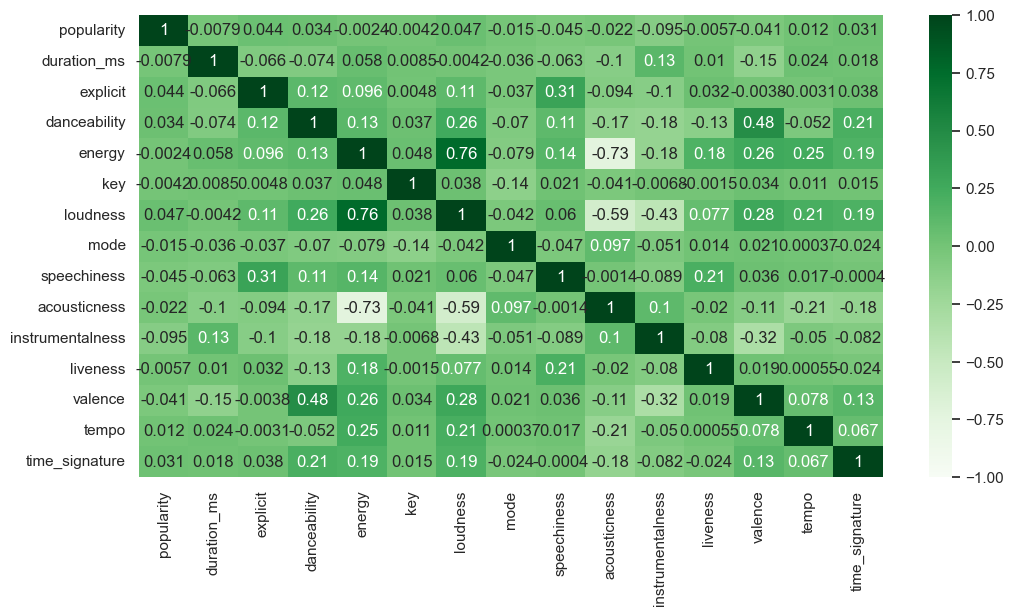

In [31]:
df_copy = df.iloc[:, 4:19]

plt.figure(figsize=(12, 6))
sns.heatmap(df_copy.corr(), vmin=-1, vmax=1, annot=True, cmap="Greens")

**Tương Quan giữa các Đặc Trưng Âm Nhạc và Năng Lượng**

- Tương Quan Mạnh
    - Có một mối tương quan mạnh và tích cực giữa 'energy' và 'loudness' với hệ số tương quan khoảng 0.76. Kết quả này cho thấy khi giá trị 'loudness' tăng, 'energy' cũng tăng theo.
    - 'acousticness' có mối tương quan mạnh và tiêu cực với 'energy' (khoảng -0.73), có thể chỉ ra rằng các bản nhạc có tính âm học cao thường có năng lượng thấp hơn.

- Tương Quan Yếu
    - Các đặc trưng như 'popularity', 'duration_ms', 'key', 'mode', và 'time_signature' có mối tương quan yếu với 'energy', ngụ ý rằng chúng không đóng vai trò lớn trong việc dự đoán 'energy' của bản nhạc.

- Mối Quan Hệ Khác
    - 'danceability' và 'valence' có mối tương quan tích cực với 'energy' (khoảng 0.13 và 0.26). Điều này cho thấy bài hát dễ nhảy và có tính cảm xúc tích cực thường có năng lượng cao hơn.
    - 'speechiness' có mối tương quan vừa phải và tích cực với 'energy' (khoảng 0.14), có thể chỉ ra rằng các bản nhạc có nhiều lời nói hơn có thể có năng lượng cao hơn một chút.

- Không Có Tương Quan Đáng Kể
    - 'tempo' và 'time_signature' không có tương quan rõ ràng với 'energy', chỉ ra rằng tốc độ bài hát và số lượng nhịp trong một phách không có ảnh hưởng lớn đến năng lượng của bản nhạc.


### Mối tương quan giữa energy và loudness.

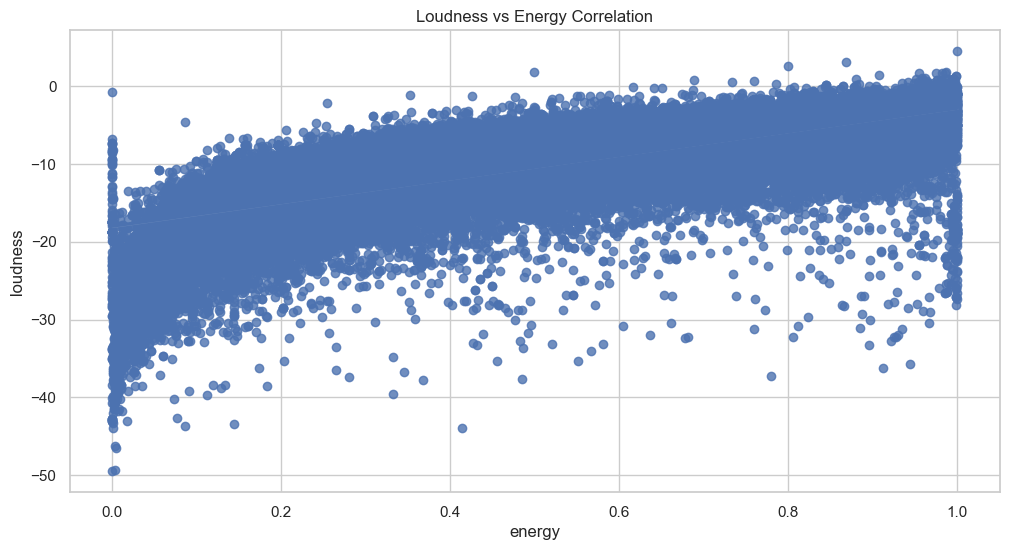

In [32]:
# vẽ mối quan hệ giữa các energy và loudness có mối quan hệ tuyến tính
plt.figure(figsize=(12, 6))
sns.regplot(x="energy", y="loudness", data=df, color='b').set(title='Loudness vs Energy Correlation')
plt.show()

**Phân tích Biểu đồ Phân tán giữa Loudness và Energy**

- Tương quan tích cực
    - Có một mối quan hệ tương quan tích cực giữa 'loudness' và 'energy', nghĩa là khi 'loudness' tăng, 'energy' cũng có xu hướng tăng. Điều này được phản ánh qua việc các điểm dữ liệu tập trung nhiều hơn ở phía trên bên phải của biểu đồ.

- Phân phối của Loudness
    - 'Loudness' có phân phối rất rộng, từ giá trị rất âm đến gần 0. Điều này cho thấy có một số bản nhạc với 'loudness' rất thấp, điều này có thể liên quan đến các thuộc tính âm nhạc khác không được biểu đồ hiển thị.

- Các giá trị cực đoan của Energy
    - Có một số bản nhạc có 'energy' rất cao, gần với giá trị 1, không phụ thuộc vào 'loudness' của chúng.

- Nhiều giá trị nằm ở mức Loudness cao
    - Khoảng 'loudness' từ -20 đến 0 có số lượng điểm dữ liệu dày đặc hơn, cho thấy đây là phạm vi loudness phổ biến cho các bản nhạc trong tập dữ liệu.

- Outliers
    - Có một số điểm dữ liệu nằm ngoài phạm vi chung (outliers), đặc biệt là ở phía 'loudness' thấp, cho thấy có một số bản nhạc với 'loudness' rất thấp nhưng có 'energy' ở các mức khác nhau, từ thấp đến cao.


### Có thể xác định thể loại nhạc dựa trên mức độ lớn của bản nhạc không? Từ đó có thể xác định độ phổ biến của các thể loại nhạc đó như thế nào và chúng có mối quan hệ nào với mức độ lớn không?

Mục Đích:

- **Phân tích mối quan hệ giữa mức độ lớn với thể loại nhạc:** Để xác định liệu có thể sử dụng mức độ lớn (loudness) của bản nhạc như một dấu hiệu dự đoán thể loại nhạc hay không?
    
- **Đánh giá độ phổ biến:** Dựa vào mức độ lớn (loudness) ta có xem với độ lớn đó thì thể loại nào đang được nhiều người yêu thích và phổ biến nhất.

Ý Nghĩa:

- **Ứng dụng cho âm nhạc:** Có thể ứng dụng trong việc phát triển sản phẩm, chiến lược tiếp thị và nghiên cứu thị trường, giúp các công ty âm nhạc và nghệ sĩ hiểu và đáp ứng tốt hơn nhu cầu của khán giả.

**Bước 1**: Kiểm tra số lượng mẫu.

In [33]:
# số thể loại nhạc trong bộ dữ liệu
df['track_genre'].value_counts()

track_genre
acoustic       1000
emo            1000
rock-n-roll    1000
reggaeton      1000
disco          1000
               ... 
honky-tonk      981
dance           965
german          963
classical       933
romance         904
Name: count, Length: 114, dtype: int64

**Bước 2**: Tính mean của "loudness"

In [34]:
# groupby track_genre và tính mean của loudness
genre_loudness_mean = df.groupby('track_genre')['loudness'].mean()

pd.DataFrame(genre_loudness_mean)

,loudness
track_genre,
acoustic,-9.447843
afrobeat,-7.789599
alt-rock,-6.194009
alternative,-6.076191
ambient,-18.596266
...,...
techno,-8.077874
trance,-6.327486
trip-hop,-9.239489


**Bước 3**: Ước lượng khoảng tin cậy cho "loudness"

- Tính số lượng mẫu cho mỗi thể loại nhạc

    - Lọc ra các thể loại có bao nhiêu bài hát

- Tính độ lệch chuẩn của mỗi thể loại nhạc

- Tính khoảng tin cậy dựa trên độ lệch chuẩn của tổng mẫu

In [35]:
# Thiết lập mức tin cậy (95%)
confidence_level = 0.95
Z = norm.ppf((1 + confidence_level) / 2)  

# Tính số lượng mẫu cho mỗi thể loại nhạc
n = df['track_genre'].value_counts()

# Tính độ lệch chuẩn của mỗi thể loại nhạc
genre_std_dev = df.groupby('track_genre')['loudness'].std()

# Tính độ lệch mẫu của mỗi thể loại nhạc
margin_of_error = Z * (genre_std_dev / np.sqrt(n))

# Tính khoảng tin cậy
confidence_interval = pd.concat([genre_loudness_mean - margin_of_error, genre_loudness_mean + margin_of_error], axis=1)
confidence_interval.columns = ['Lower', 'Upper']
confidence_interval

,Lower,Upper
track_genre,,
acoustic,-9.681722,-9.213964
afrobeat,-7.958861,-7.620337
alt-rock,-6.339220,-6.048798
alternative,-6.221312,-5.931070
ambient,-19.093714,-18.098818
...,...,...
techno,-8.267578,-7.888170
trance,-6.454547,-6.200426
trip-hop,-9.426995,-9.051984


**Visualize 10 nhóm đầu tiên**
- Lọc và vẽ ra 10 giá trị của khoảng tin cậy của thể loại nhạc đầu tiên

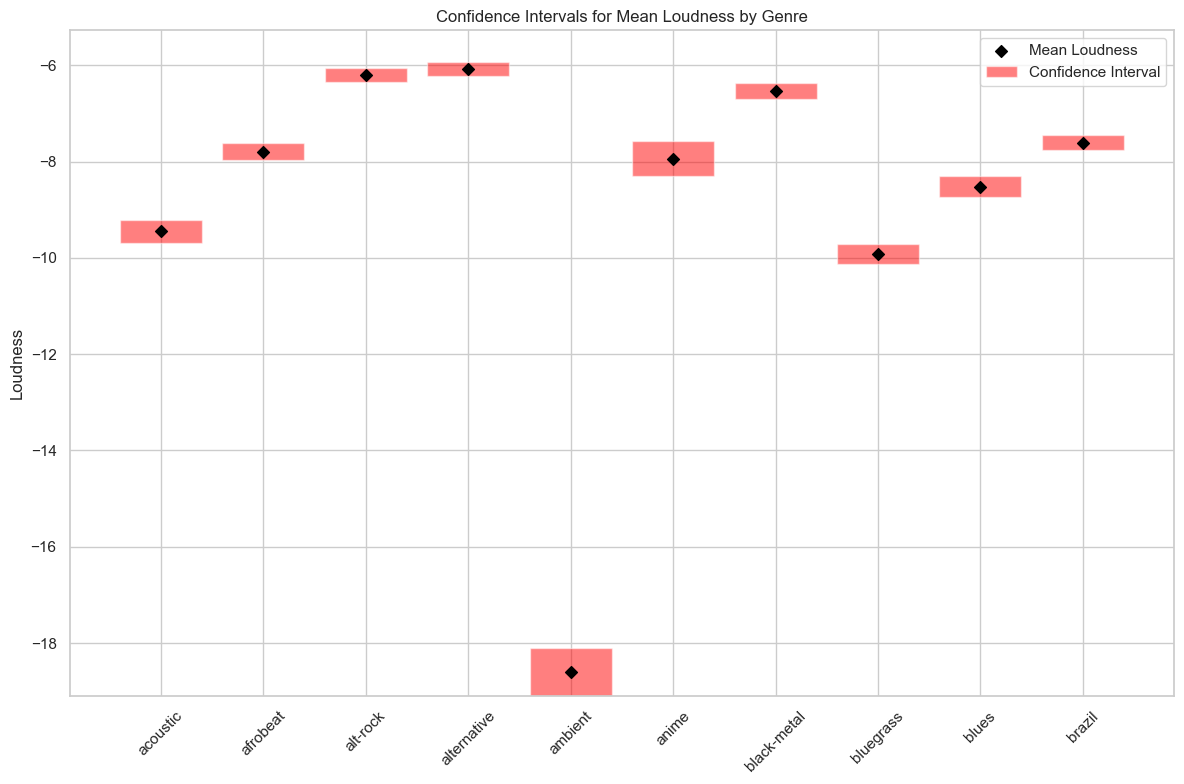

In [36]:
sample_confidence_interval = confidence_interval.head(10)

# Tạo biểu đồ cải tiến
plt.figure(figsize=(12, 8))

# Biểu đồ cột cho trung bình độ lớn
plt.bar(sample_confidence_interval.index, sample_confidence_interval['Upper'] - sample_confidence_interval['Lower'], 
        bottom=sample_confidence_interval['Lower'], color='red', alpha=0.5, label='Confidence Interval')

# Đánh dấu trung bình độ lớn
plt.scatter(sample_confidence_interval.index, genre_loudness_mean.head(10), color='black', marker='D', label='Mean Loudness')
plt.xticks(rotation=45)
plt.ylabel('Loudness')
plt.title('Confidence Intervals for Mean Loudness by Genre')
plt.legend()
plt.tight_layout()
plt.show()

- Từ biểu đồ này ta có thể xác định được khoảng tin cậy của loudness.

**Bước 4**: Xác định các thể loại nhạc.

In [37]:
def predict_genre_base_on_estimates(loudness, confidence_intervals):
    # Xác định các thể loại nhạc phù hợp với giá trị 'loudness'
    possible_genres = [genre for genre, row in confidence_intervals.iterrows() if row['Lower'] <= loudness <= row['Upper']] 
    if len(possible_genres) == 0:
        return None 
    else:
        return possible_genres

# Sử dụng hàm
loudness_input = -6.2  # Giá trị loudness mẫu
possible_genres = predict_genre_base_on_estimates(loudness_input, confidence_interval)

# In kết quả
print()
print(f"\t- Với giá trị loudness là {loudness_input}, thể loại nhạc có thể là: ")
for genre in possible_genres:
    print(f"\t\t+ " + genre)



	- Với giá trị loudness là -6.2, thể loại nhạc có thể là: 
		+ alt-rock
		+ alternative
		+ breakbeat
		+ dancehall
		+ dub
		+ electro
		+ grindcore
		+ j-dance
		+ j-pop
		+ ska


**Độ phổ biến của các thể loại nhạc này**

- Lọc ra các nhóm thể loại nằm trong khoảng tin cậy của loudness.
- Tính toán dựa trên popularity

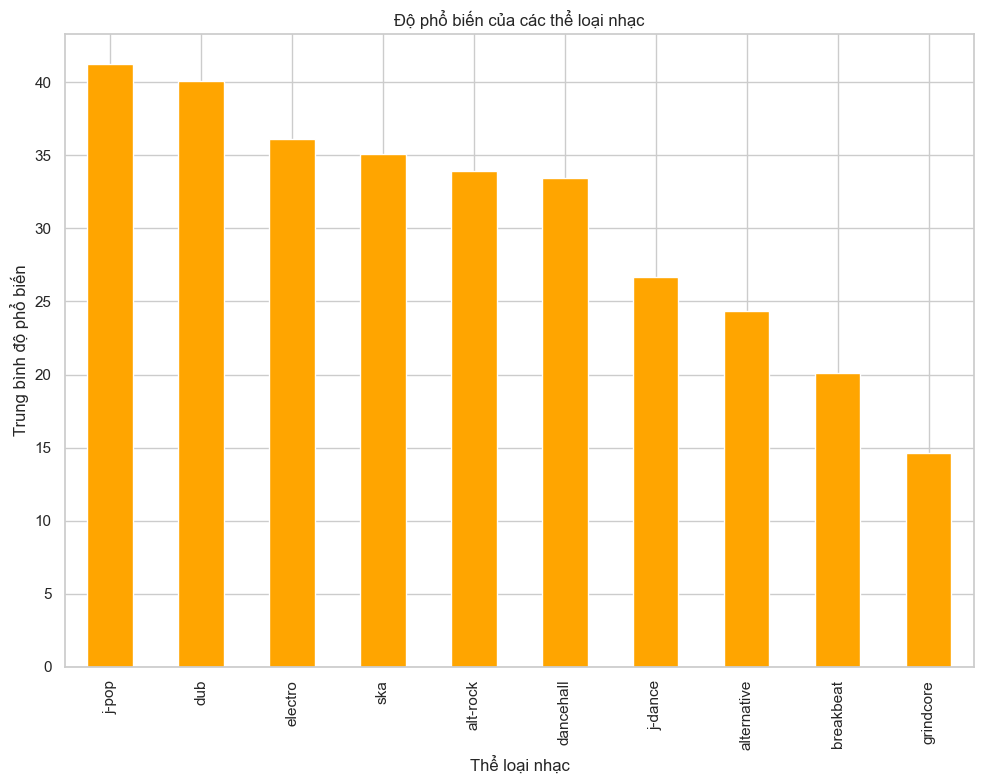

In [38]:
# Tính trung bình độ phổ biến của mỗi thể loại nhạc 
popularity_of_genres = df[df['track_genre'].isin(possible_genres)].groupby('track_genre')['popularity'].mean()

# Sắp xếp theo thứ tự giảm dần
popularity_of_genres.sort_values(ascending=False)

# Vẽ biểu đồ
plt.figure(figsize=(10,8))
popularity_of_genres.sort_values(ascending=False).plot(kind='bar', color='orange')
plt.title('Độ phổ biến của các thể loại nhạc')
plt.xlabel('Thể loại nhạc')
plt.ylabel('Trung bình độ phổ biến')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

- Từ biểu đồ ta có thể thấy đươc với cùng 1 mức độ âm thanh (loudness) có thể có nhiều thể loại nhạc khác nhau nhưng trong số đó ta có thể thấy được mức độ phổ biến của thể loại nhạc nào đang được ưu chuộng nhất.

- Và phần nào cũng giúp cho nền âm nhạc xác định được với mức âm thanh (loudness) này thì thể loại nào được mọi người thích nhất.

----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

## **Phần muốn phát triển thêm nhưng chưa ổn**


## Xây dựng model dự đoán chính xác 1 thể loại nhạc.

- Mục đích để dự đoán: dùng cột giá trị energy để xác định thể loại nếu có nhiều hơn 1 thể loại được dự đoán từ input loudness (dựa vào khoảng tin cậy của "loudness").

In [39]:
# Chuẩn bị dữ liệu cho hồi quy tuyến tính
X = df['loudness']  # Biến độc lập
y = df['energy']    # Biến phụ thuộc

model = LinearRegression()
model.fit(X.values.reshape(-1, 1), y)

LinearRegression()

In [40]:
def predict_genre_based_on_loudness_and_energy(loudness, model, df, confidence_intervals):
    # Dự đoán 'energy' từ 'loudness'
    predicted_energy = model.predict([[loudness]])[0]
    print(f"\t- Giá trị energy dự đoán từ model: {predicted_energy}")
    print()
    # Xác định các thể loại nhạc phù hợp với giá trị 'loudness'
    possible_genres = [genre for genre, row in confidence_intervals.iterrows() if row['Lower'] <= loudness <= row['Upper']]
    print()
    print(f"\t- Với giá trị loudness là {loudness_input}, thể loại nhạc có thể là: ")
    for genre in possible_genres:
        print(f"\t\t+ " + genre)

    print()
    # Nếu có nhiều hơn một thể loại, chọn thể loại có giá trị trung bình 'energy' gần nhất với giá trị dự đoán
    if len(possible_genres) > 1:
        genre_energy_means = df.groupby('track_genre')['energy'].mean()
        closest_genre = min(possible_genres, key=lambda genre: abs(genre_energy_means[genre] - predicted_energy))
        return closest_genre
    elif possible_genres:
        return possible_genres[0]
    else:
        return "Unknown"

# Sử dụng hàm
loudness_input = -6.2  # Giá trị loudness mẫu
predicted_genre = predict_genre_based_on_loudness_and_energy(loudness_input, model, df, confidence_interval)

print(f"\t- Với giá trị loudness là {loudness_input}, thể loại nhạc có thể là: {predicted_genre}")

	- Giá trị energy dự đoán từ model: 0.7199537111077449


	- Với giá trị loudness là -6.2, thể loại nhạc có thể là: 
		+ alt-rock
		+ alternative
		+ breakbeat
		+ dancehall
		+ dub
		+ electro
		+ grindcore
		+ j-dance
		+ j-pop
		+ ska

	- Với giá trị loudness là -6.2, thể loại nhạc có thể là: alternative


## Reflection

| Thành viên | Khó khăn bạn gặp phải? | Bạn đã học được những gì? |
| :--- | :--- | :--- |
| Phan Gia Bảo | - Mất thời gian trong việc tìm hiểu bộ dữ liệu do thiếu kiến thức về âm nhạc.<br> - Nghiên cứu thực hiện một model đề xuất gặp nhiều khó khăn nên chưa thể triển khai trên đồ án được.<br> - Quá trình tim dữ liệu tốn rất nhiều thời gian. | - Cần tham khảo những nghiên cứu về chủ đề bản thân quan tâm trước khi đi tìm kiếm tập dữ liệu.<br> - Trực quan hóa đa dạng hơn các biểu đồ cho bộ dữ liệu của mình. |
| Đỗ Nguyễn Khánh Hưng | - Em đã gặp khó khăn mất khá nhiều thời gian để hiểu bộ data với ý nghĩa của từng cột thuộc tính.<br> - Bộ data chọn khá nhiều cột phải hiểu chuyên sâu về âm nhạc.<br> - Em muốn phát triển model để dựa đoán ra thể loại nhạc nhưng gặp khá nhiều câu hỏi đặt ra trong quá trình này: Không biết có thể phát triển biến độc lập nhiều hơn nếu dựa trên khoảng tin cậy của loudness hay không ?, Model xây dựng có đúng không ?, Model có đang bị overfitting không ?, Quá trình đưa vào dự đoán chỉ từ 1 cột sang 1 cột có đang bị mặc định quá không ? (1 -> 1 hay 3 -> 4)<br> - Không biết câu hỏi đặt ra có ổn chưa? Có hợp lí cho việc khám phá dữ liệu chưa ? <br> - Câu hỏi EDA có đánh vào lợi ích chưa ?| - Biết cách sử dụng Git và Github cũng như làm việc nhóm trên nền tảng này. <br> - Cách giải quyết vấn đề nếu đang trong quá trình làm bài (có thể họp để hỏi ý kiện nhóm).<br> - Mạnh dạn trao đổi với nhau đưa ra vấn đề và cùng nhau giải quyết vấn đề, cải thiện được việc hoạt động nhóm. Em chủ động hơn và đặt ra nhiều câu hỏi để hiểu rõ hơn về đề tài đang nghiên cứu. <br> - Em đã học được hiểu các phương pháp xử lý vô số giá trị nhiễu có thể phát sinh trong quá trình trả lời câu hỏi.|
| Trần Bảo Minh | - Em đã gặp khó khăn mất khá nhiều thời gian để hiểu bộ data với ý nghĩa của từng cột thuộc tính | - Biết cách sử dụng Git và Github cũng như làm việc nhóm trên nền tảng này.<br> - Em đã học được Hiểu các phương pháp xử lý vô số giá trị nhiễu có thể phát sinh trong quá trình trả lời câu hỏi. |